In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ionosphere_data = fetch_openml(name='ionosphere', version=1, as_frame=False)
X = ionosphere_data.data
y = ionosphere_data.target.astype('str')  # Convert target labels to strings
print("Dataset loaded.")

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Dataset loaded.


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [6]:
y_pred = knn_classifier.predict(X_test)

In [7]:
print("Classification Report:")
print(classification_report(y_test, y_pred, output_dict=True))

Classification Report:
{'b': {'precision': 1.0, 'recall': 0.5897435897435898, 'f1-score': 0.7419354838709677, 'support': 39}, 'g': {'precision': 0.8072289156626506, 'recall': 1.0, 'f1-score': 0.8933333333333333, 'support': 67}, 'accuracy': 0.8490566037735849, 'macro avg': {'precision': 0.9036144578313253, 'recall': 0.7948717948717949, 'f1-score': 0.8176344086021505, 'support': 106}, 'weighted avg': {'precision': 0.8781541259377132, 'recall': 0.8490566037735849, 'f1-score': 0.8376303509839723, 'support': 106}}



Confusion Matrix (Percentages):


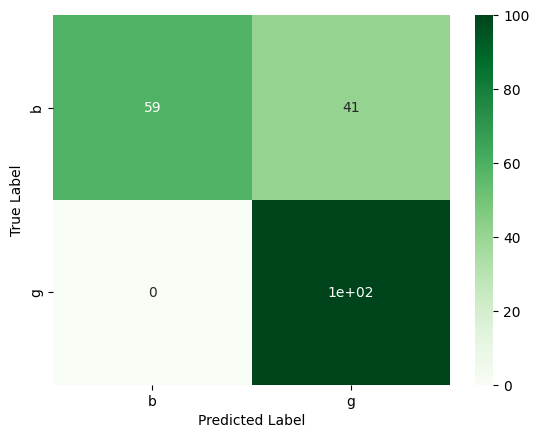

In [8]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix (Percentages):")
conf_matrix_percent = conf_matrix / np.sum(conf_matrix, axis=1, keepdims=True) * 100
ax = sns.heatmap(conf_matrix_percent, annot=True, cmap='Greens', xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()


In [9]:
lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test)
y_pred_proba = knn_classifier.predict_proba(X_test)


In [10]:
fpr, tpr, thresholds = roc_curve(y_test_binary.ravel(), y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

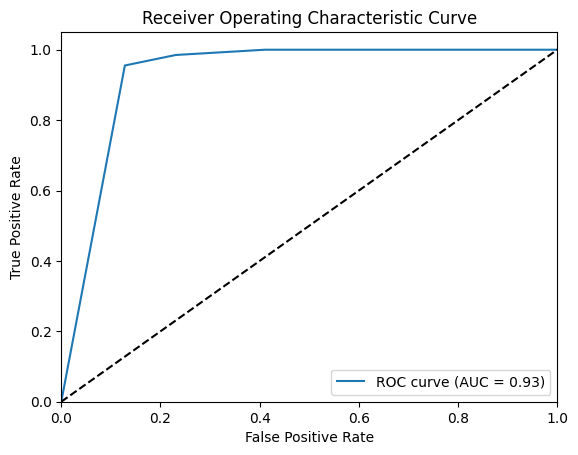

In [11]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--',)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [12]:
print("\nPredicted Classes:")
for pred, true in zip(y_pred, y_test):
    print(f"Predicted: {pred}, True: {true}")


Predicted Classes:
Predicted: g, True: g
Predicted: g, True: g
Predicted: g, True: g
Predicted: g, True: b
Predicted: g, True: g
Predicted: g, True: g
Predicted: g, True: g
Predicted: g, True: g
Predicted: g, True: g
Predicted: g, True: g
Predicted: g, True: b
Predicted: b, True: b
Predicted: b, True: b
Predicted: g, True: b
Predicted: g, True: g
Predicted: g, True: b
Predicted: g, True: g
Predicted: g, True: b
Predicted: g, True: g
Predicted: b, True: b
Predicted: g, True: g
Predicted: b, True: b
Predicted: b, True: b
Predicted: g, True: g
Predicted: g, True: g
Predicted: g, True: b
Predicted: b, True: b
Predicted: b, True: b
Predicted: b, True: b
Predicted: g, True: g
Predicted: g, True: g
Predicted: g, True: g
Predicted: g, True: g
Predicted: g, True: g
Predicted: g, True: g
Predicted: b, True: b
Predicted: g, True: g
Predicted: g, True: g
Predicted: b, True: b
Predicted: g, True: g
Predicted: g, True: g
Predicted: g, True: g
Predicted: g, True: g
Predicted: b, True: b
Predicted: g